In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import display
from PIL import Image


In [63]:
def cv2Show(img):
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img))

In [64]:
back_img = cv2.imread('airport.jpg')
front_img = cv2.imread('bags.jpg')

In [65]:
#cv2Show(front_img)

In [66]:
#cv2Show(back_img)



In [67]:
print(back_img.shape)
print(front_img.shape)

(3762, 5636, 3)
(452, 452, 3)


In [68]:
front_small_img = cv2.resize(front_img,(452,452))


In [69]:
#cv2Show(front_small_img)

In [70]:
x_offset=2200
y_offset=3000

In [71]:
rows,columns,chanels = front_small_img.shape
print(rows,columns,chanels)
roi = back_img[y_offset:3452, x_offset:2652]

452 452 3


In [72]:
#cv2Show(roi)


In [73]:
front_small_img = cv2.GaussianBlur(front_small_img,(5,5),0)


In [74]:
front_small_img_gray = cv2.cvtColor(front_small_img, cv2.COLOR_RGB2GRAY)


In [75]:
#cv2Show(front_small_img_gray)

In [76]:
#ret, mask = cv2.threshold(front_small_img_gray, 125, 180, cv2.THRESH_BINARY)
ret, mask = cv2.threshold(front_small_img_gray, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)

In [77]:
#cv2Show(mask)

In [78]:
bg = cv2.bitwise_or(roi,roi,mask = mask)
#cv2Show(bg)

In [79]:
mask_inv = cv2.bitwise_not(front_small_img_gray)

In [80]:
#cv2Show(mask_inv)

In [81]:
fg = cv2.bitwise_and(front_small_img,front_small_img, mask=mask_inv)
#cv2Show(fg)

In [82]:
# SECTION B
# functions for blending operations

# takes a pixel from image 1 (pix_1)  and blends it with pixel from image 2 (pix_2)
# depending on the value given in perc (percentage)
# perc = 0 or 255 or [0,0,0] or [255,255,255] (equals 0 or 100 percent) -> will perform 
# no blending at all and return the value of image 1 or image 2;
# by constrast, all values in between will give a weighted blend of the two images
# can be used with scalars or numpy arrays (perc as well which is a greyscale image then)
def mix_pixel(pix_1, pix_2, perc):

    return (perc/255 * pix_1) + ((255 - perc)/255 * pix_2)

In [83]:
# function for blending images depending on values given in mask
def blend_images_using_mask(img_orig, img_for_overlay, img_mask):

    # turn mask into 24 bit greycale image if necessary,
    # because mix_pixel() requires numpy arrarys having the same dimensions;
    # if img is 24-bit bgr, the image has three dimensions, if 8 bit grey only 2
    if len(img_mask.shape) != 3:
        img_mask = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

    # interpolate between two images (img_orig and img_to_insert)
    # using the weights in img_mask (each pixel (0,0,0 to 255,255,255) 
    # serves as individual weight);
    # because all three images are numpy arrays standard operators
    # for multiplication etc. will be applied to all values in arrays
    img_res = mix_pixel(img_orig, img_for_overlay, img_mask)

    return img_res.astype(np.uint8)

In [84]:
# SECTION C; blend images and display results
# call function defined above -> blending with "weighted" mask
img_blended = blend_images_using_mask(fg, bg,mask_inv)
#img_blended = blend_images_using_mask(front_small_img, bg,mask_inv)

#cv2Show(img_blended)
cv2.imwrite('roi_blended.jpg',img_blended)

True

In [85]:
#final_roi = cv2.add(bg,fg)
#cv2Show(final_roi)

In [86]:
#small_img = final_roi
small_img = img_blended

In [87]:
back_img[y_offset : y_offset + small_img.shape[0], x_offset : x_offset + small_img.shape[1]]= small_img

In [88]:
#cv2Show(back_img)
cv2.imwrite('output_blending.jpg',back_img)

True

In [93]:
import numpy as np
import cv2

In [94]:
# SECTION A
# use opencv function imread to load images

# code only works with 24 bit images (but can be adapted)

# load image that will serve as "foreground"
img = cv2.imread("bags.jpg",  cv2.IMREAD_UNCHANGED)
print(img.shape)
#img = np.rot90(img,3) # used to rotate image if necessary

# load image that will be blended with foreground image
img_insert = cv2.imread("airport.jpg", cv2.IMREAD_UNCHANGED)

(452, 452, 3)


In [105]:
# load mask; mask defines where and to which extent the two images 
# above are blended together
#1)
# simple binary image (black and white only)
#img_insert_mask = cv2.imread("SimpleMask.jpg", cv2.IMREAD_UNCHANGED)

# or do additional blurring here by using e.g.
#img_insert_mask = cv2.blur(img_insert_mask, (33,33))
#or invert mask (turns black to white and vice versa)
#img_insert_mask = cv2.bitwise_not(img_insert_mask)

#2)
# or use more sophisticated masks
#img_insert_mask = cv2.imread("NotSoSimpleMask.jpg", cv2.IMREAD_UNCHANGED)
front_small_img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
front_small_img_gray=cv2.GaussianBlur(front_small_img_gray,(5,5),0)
ret, mask = cv2.threshold(front_small_img_gray, 125, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

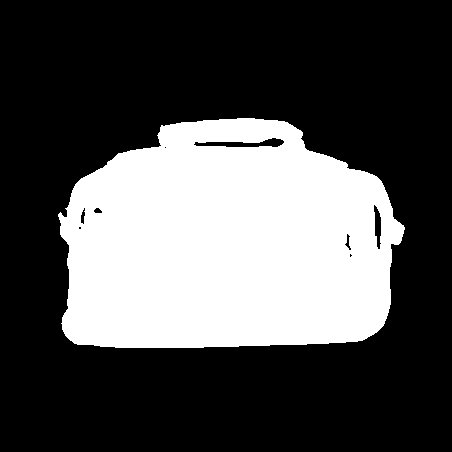

In [106]:
#cv2Show(mask_inv)

In [107]:
#img_insert_mask = cv2.imread("TransitionMask.jpg", cv2.IMREAD_UNCHANGED)# transition from black to white

#3)
# or modify the image mask by changing black values, for instance (are 0 or [0,0,0] in original mask image),
# use the NumPy where() function for that, which takes a condition as first argument;
# the second argument tells the function which value should be assigned if condition is met,
# while the third argument tells the function which value will be assigned if condition is not met;
# for three channel greyscale images (24 bit) use for instance
#img_insert_mask = np.where(img_insert_mask[:,:] ==[0,0,0],img_insert_mask[:,:] + [170,170,170], img_insert_mask)
# for  one channel greycale images (8 bit) use
#img_insert_mask = np.where(img_insert_mask[:,:] ==0,img_insert_mask[:,:] + 170, img_insert_mask)